In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt   #Esto es para poder hacer gráficos
import seaborn as sns
import re

**Resumen Exploración:**  
- Comprobamos que el número de columnas fuera igual en todos los dataframes.

- Nos dimos cuenta de que los ingresos y las fechas estaban en formato object. Además las fechas de 2016 y 2019 estaban ordenadas en día, mes y año en lugar de año, mes y día.

- Nos dimos cuenta de que utilizando los códigos podríamos rellenar algunos nan de los nombres de organizaciones etc.

- Nos dimos cuenta que algunas columnas ya incluían un valor de Sem informaçao donde podíamos agrupar con los nan pues reflejan lo mismo.


*Data frame corrupción*  


Aquí tenemos el funcionamiento de latinoamérica, distribuido en 3 momentos:  

- Valor Previsto Actualizado es lo que el gobierno prevee como ingreso
- Valor Lanzado es lo que se presenta en los libros, lo que se contabiliza como esperado.
- Valor Realizado fue lo que realmente se consiguió como ingresos.

Esto quiere decir que el gobierno apuntaba a una recolección de ingresos alta, sin embargo hizo una declaración baja sobre lo esperado (incluso blanqueó algunas cifras) y se consiguió que la realidad de ingresos fuese cercana a esa primera estimación.

Valor Realizado - valor Lanzado es la corrupción.

**Resumen de exploración en archivo sin Nan:**  


- Mantenemos la misma cantidad de columnas, solo que ahora contamos con la que hemos creado llamada 'Porcentaje Ejecutado'.  

- Partimos con un shape de (892276, 16) filas y columnas.
*Datos de interés:*  

- Tenemos una concentración de 4 años (2013-2017) en el primer 25% de los casos registrados, luego existe un alza de registros y el percentil 50% va hasta los casos que se extienden al 2018 (mediana). Esto se considera lógico debido a que los primeros 3 años (2013-2015) tienen la menor cantidad de registros.
Del 2018 al 2020 existe el salto al percentil 75% ya tienen una agrupación de datos similares. Del 75 al 100% se completa con los registros del año 2021.


- En cuanto a CATEGORIA ECONÔMICA, tenemos a 'Receitas Correntes' como la de mayor aparición. Esta cuenta con el 93% de registros.



***FASE1.1 EDA individuales***

In [2]:
df_13= pd.read_csv("datos/datos-2013.csv", sep= ";")
pd.set_option("display.max_columns", None)
df_14= pd.read_csv("datos/datos-2014.csv", sep= ";")
pd.set_option("display.max_columns", None)
df_15= pd.read_csv("datos/datos-2015.csv", sep= ";")
pd.set_option("display.max_columns", None)
df_16= pd.read_csv("datos/datos-2016.csv", sep= ";")
pd.set_option("display.max_columns", None)
df_17= pd.read_csv("datos/datos-2017.csv", sep= ";")
pd.set_option("display.max_columns", None)
df_18= pd.read_csv("datos/datos-2018.csv", sep= ";")
pd.set_option("display.max_columns", None)
df_19= pd.read_csv("datos/datos-2019.csv", sep= ";")
pd.set_option("display.max_columns", None)
df_20= pd.read_csv("datos/datos-2020.csv", sep= ";")
pd.set_option("display.max_columns", None)
df_21= pd.read_csv("datos/datos-2021.csv", sep= ";")
pd.set_option("display.max_columns", None)
#Falta abrir el diccionario de datos


In [3]:
df_dicc= pd.read_csv("datos/diccionario_datos.csv", sep= ";;", encoding= "latin-1")
pd.set_option("display.max_columns", None)

C:\Users\jaime\AppData\Local\Temp\ipykernel_20752\3123453317.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_dicc= pd.read_csv("datos/diccionario_datos.csv", sep= ";;", encoding= "latin-1")


In [4]:
df_dicc.head()

,COLUNA,DESCRIÇÃO;
0,NaN,;
1,Código Órgão Superior,Código do Órgão Superior responsável pela rece...
2,NaN,;
3,NaN,Nome do Órgão Superior responsável pela receita.;
4,Nome Órgão Superior,;


In [5]:
df_13.columns = [name.lower().strip() for name in df_13.columns]                        
df_14.columns = [name.lower().strip() for name in df_14.columns] 
df_15.columns = [name.lower().strip() for name in df_15.columns] 
df_16.columns = [name.lower().strip() for name in df_16.columns] 
df_17.columns = [name.lower().strip() for name in df_17.columns] 
df_18.columns = [name.lower().strip() for name in df_18.columns] 
df_19.columns = [name.lower().strip() for name in df_19.columns] 
df_20.columns = [name.lower().strip() for name in df_20.columns] 
df_21.columns = [name.lower().strip() for name in df_21.columns] #Cambios de nombre en todas las columnas de todos los df

***Comprobación de que tengan las mismas columnas***

In [6]:
df_13.columns.tolist()

['código órgão superior',
 'nome órgão superior',
 'código órgão',
 'nome órgão',
 'código unidade gestora',
 'nome unidade gestora',
 'categoria econômica',
 'origem receita',
 'espécie receita',
 'detalhamento',
 'valor previsto atualizado',
 'valor lançado',
 'valor realizado',
 'percentual realizado',
 'data lançamento',
 'ano exercício']

In [7]:
df_13.columns.tolist() == df_14.columns.tolist() ==df_15.columns.tolist() == df_16.columns.tolist() == df_17.columns.tolist() == df_18.columns.tolist() == df_19.columns.tolist() == df_20.columns.tolist() == df_21.columns.tolist() 

True

In [8]:
df_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   código órgão superior      4331 non-null   float64
 1   nome órgão superior        2959 non-null   object 
 2   código órgão               4493 non-null   float64
 3   nome órgão                 4439 non-null   object 
 4   código unidade gestora     4332 non-null   float64
 5   nome unidade gestora       4392 non-null   object 
 6   categoria econômica        4502 non-null   object 
 7   origem receita             4487 non-null   object 
 8   espécie receita            4455 non-null   object 
 9   detalhamento               4506 non-null   object 
 10  valor previsto atualizado  4325 non-null   object 
 11  valor lançado              4375 non-null   object 
 12  valor realizado            4328 non-null   object 
 13  percentual realizado       4437 non-null   objec

In [9]:
df_15['nome órgão superior'] = df_15.groupby('código órgão superior')['nome órgão superior'].transform(lambda x: x.fillna(method='ffill'))
df_15['nome órgão superior'].info() #Columna codigo y nombre


df_15["data lançamento"] = pd.to_datetime(df_15["data lançamento"]) 
df_15["data lançamento"]  #cambio a fecha

df_15["valor realizado"]= df_15["valor realizado"].str.replace(",",".")
df_15["valor realizado"] = list(map(float, df_15["valor realizado"]))
df_15["valor lançado"]= df_15["valor lançado"].str.replace(",",".")
df_15["valor lançado"] = list(map(float, df_15["valor lançado"]))
df_15["valor previsto atualizado"]= df_15["valor previsto atualizado"].str.replace(",",".")
df_15["valor previsto atualizado"] = list(map(float, df_15["valor previsto atualizado"]))
df_15["percentual realizado"]= df_15["percentual realizado"].str.replace(",",".")
df_15["percentual realizado"] = list(map(float, df_15["percentual realizado"]))    #cambio a float

<class 'pandas.core.series.Series'>
RangeIndex: 4523 entries, 0 to 4522
Series name: nome órgão superior
Non-Null Count  Dtype 
--------------  ----- 
4308 non-null   object
dtypes: object(1)
memory usage: 35.5+ KB


C:\Users\jaime\AppData\Local\Temp\ipykernel_20752\192372322.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_15['nome órgão superior'] = df_15.groupby('código órgão superior')['nome órgão superior'].transform(lambda x: x.fillna(method='ffill'))
C:\Users\jaime\AppData\Local\Temp\ipykernel_20752\192372322.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_15["data lançamento"] = pd.to_datetime(df_15["data lançamento"])


In [10]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4523 entries, 0 to 4522
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   código órgão superior      4324 non-null   float64       
 1   nome órgão superior        4308 non-null   object        
 2   código órgão               4351 non-null   float64       
 3   nome órgão                 4361 non-null   object        
 4   código unidade gestora     4326 non-null   float64       
 5   nome unidade gestora       4449 non-null   object        
 6   categoria econômica        4463 non-null   object        
 7   origem receita             4346 non-null   object        
 8   espécie receita            4320 non-null   object        
 9   detalhamento               4393 non-null   object        
 10  valor previsto atualizado  4297 non-null   float64       
 11  valor lançado              4381 non-null   float64       
 12  valor 

In [11]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194533 entries, 0 to 194532
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   código órgão superior      190214 non-null  float64
 1   nome órgão superior        126446 non-null  object 
 2   código órgão               190506 non-null  float64
 3   nome órgão                 191144 non-null  object 
 4   código unidade gestora     185211 non-null  float64
 5   nome unidade gestora       191552 non-null  object 
 6   categoria econômica        192399 non-null  object 
 7   origem receita             186042 non-null  object 
 8   espécie receita            190129 non-null  object 
 9   detalhamento               186707 non-null  object 
 10  valor previsto atualizado  184806 non-null  object 
 11  valor lançado              188960 non-null  object 
 12  valor realizado            188766 non-null  object 
 13  percentual realizado       19

In [12]:
df_16['nome órgão superior'] = df_16.groupby('código órgão superior')['nome órgão superior'].transform(lambda x: x.fillna(method='ffill'))
df_16['nome órgão superior'].info() #Columna codigo y nombre


df_16["data lançamento"] = pd.to_datetime(df_16["data lançamento"], format="%d/%m/%Y")   #He tenido que especificar que venía en otro formato distinto.
df_16["data lançamento"]  #cambio a fecha

df_16["valor realizado"]= df_16["valor realizado"].str.replace(",",".")
df_16["valor realizado"] = list(map(float, df_16["valor realizado"]))
df_16["valor lançado"]= df_16["valor lançado"].str.replace(",",".")
df_16["valor lançado"] = list(map(float, df_16["valor lançado"]))
df_16["valor previsto atualizado"]= df_16["valor previsto atualizado"].str.replace(",",".")
df_16["valor previsto atualizado"] = list(map(float, df_16["valor previsto atualizado"]))
df_16["percentual realizado"]= df_16["percentual realizado"].str.replace(",",".")
df_16["percentual realizado"] = list(map(float, df_16["percentual realizado"]))    #cambio a float

<class 'pandas.core.series.Series'>
RangeIndex: 194533 entries, 0 to 194532
Series name: nome órgão superior
Non-Null Count   Dtype 
--------------   ----- 
190203 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


C:\Users\jaime\AppData\Local\Temp\ipykernel_20752\3871943138.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_16['nome órgão superior'] = df_16.groupby('código órgão superior')['nome órgão superior'].transform(lambda x: x.fillna(method='ffill'))


In [13]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194533 entries, 0 to 194532
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   código órgão superior      190214 non-null  float64       
 1   nome órgão superior        190203 non-null  object        
 2   código órgão               190506 non-null  float64       
 3   nome órgão                 191144 non-null  object        
 4   código unidade gestora     185211 non-null  float64       
 5   nome unidade gestora       191552 non-null  object        
 6   categoria econômica        192399 non-null  object        
 7   origem receita             186042 non-null  object        
 8   espécie receita            190129 non-null  object        
 9   detalhamento               186707 non-null  object        
 10  valor previsto atualizado  184806 non-null  float64       
 11  valor lançado              188960 non-null  float64 

In [14]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190479 entries, 0 to 190478
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   código órgão superior      185999 non-null  float64
 1   nome órgão superior        123811 non-null  object 
 2   código órgão               188418 non-null  float64
 3   nome órgão                 185457 non-null  object 
 4   código unidade gestora     186949 non-null  float64
 5   nome unidade gestora       188076 non-null  object 
 6   categoria econômica        187950 non-null  object 
 7   origem receita             181808 non-null  object 
 8   espécie receita            181798 non-null  object 
 9   detalhamento               186726 non-null  object 
 10  valor previsto atualizado  180955 non-null  object 
 11  valor lançado              182124 non-null  object 
 12  valor realizado            182807 non-null  object 
 13  percentual realizado       18

In [15]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173944 entries, 0 to 173943
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   código órgão superior      165690 non-null  float64
 1   nome órgão superior        113064 non-null  object 
 2   código órgão               168716 non-null  float64
 3   nome órgão                 166611 non-null  object 
 4   código unidade gestora     166913 non-null  float64
 5   nome unidade gestora       171411 non-null  object 
 6   categoria econômica        170516 non-null  object 
 7   origem receita             168037 non-null  object 
 8   espécie receita            166386 non-null  object 
 9   detalhamento               167435 non-null  object 
 10  valor previsto atualizado  165247 non-null  object 
 11  valor lançado              170168 non-null  object 
 12  valor realizado            165640 non-null  object 
 13  percentual realizado       17

In [16]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176828 entries, 0 to 176827
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   código órgão superior      170865 non-null  float64
 1   nome órgão superior        114938 non-null  object 
 2   código órgão               173643 non-null  float64
 3   nome órgão                 169862 non-null  object 
 4   código unidade gestora     171547 non-null  float64
 5   nome unidade gestora       174840 non-null  object 
 6   categoria econômica        174890 non-null  object 
 7   origem receita             168623 non-null  object 
 8   espécie receita            172708 non-null  object 
 9   detalhamento               172006 non-null  object 
 10  valor previsto atualizado  167987 non-null  object 
 11  valor lançado              172190 non-null  object 
 12  valor realizado            169191 non-null  object 
 13  percentual realizado       17

In [17]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176828 entries, 0 to 176827
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   código órgão superior      170865 non-null  float64
 1   nome órgão superior        114938 non-null  object 
 2   código órgão               173643 non-null  float64
 3   nome órgão                 169862 non-null  object 
 4   código unidade gestora     171547 non-null  float64
 5   nome unidade gestora       174840 non-null  object 
 6   categoria econômica        174890 non-null  object 
 7   origem receita             168623 non-null  object 
 8   espécie receita            172708 non-null  object 
 9   detalhamento               172006 non-null  object 
 10  valor previsto atualizado  167987 non-null  object 
 11  valor lançado              172190 non-null  object 
 12  valor realizado            169191 non-null  object 
 13  percentual realizado       17

In [18]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142348 entries, 0 to 142347
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   código órgão superior      137044 non-null  float64
 1   nome órgão superior        92526 non-null   object 
 2   código órgão               135491 non-null  float64
 3   nome órgão                 135255 non-null  object 
 4   código unidade gestora     138764 non-null  float64
 5   nome unidade gestora       139702 non-null  object 
 6   categoria econômica        136452 non-null  object 
 7   origem receita             138019 non-null  object 
 8   espécie receita            137467 non-null  object 
 9   detalhamento               138373 non-null  object 
 10  valor previsto atualizado  135231 non-null  object 
 11  valor lançado              140252 non-null  object 
 12  valor realizado            138063 non-null  object 
 13  percentual realizado       14

In [19]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134593 entries, 0 to 134592
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   código órgão superior      133191 non-null  float64
 1   nome órgão superior        87485 non-null   object 
 2   código órgão               131202 non-null  float64
 3   nome órgão                 129997 non-null  object 
 4   código unidade gestora     130352 non-null  float64
 5   nome unidade gestora       128118 non-null  object 
 6   categoria econômica        131846 non-null  object 
 7   origem receita             132106 non-null  object 
 8   espécie receita            132754 non-null  object 
 9   detalhamento               132439 non-null  object 
 10  valor previsto atualizado  127863 non-null  object 
 11  valor lançado              133148 non-null  object 
 12  valor realizado            129379 non-null  object 
 13  percentual realizado       12

In [20]:
df_13.sample(3)

,código órgão superior,nome órgão superior,código órgão,nome órgão,código unidade gestora,nome unidade gestora,categoria econômica,origem receita,espécie receita,detalhamento,valor previsto atualizado,valor lançado,valor realizado,percentual realizado,data lançamento,ano exercício
2168,26000.0,Ministério da Educação,26430.0,Instituto Federal do Sertão de Pernambuco,158149.0,"INST.FED.DE ED.,CIENC.E TEC.DO S.PERNAMBUCANO",Receitas Correntes,Receita de Serviços,Receita de Serviços,TAR.INSCR.CONCURSOS E PROCESSOS SELETIVOS,"203918,00","0,00","178930,00","88,00",31/12/2013,2013.0
965,25000.0,Ministério da Economia,30203.0,"Instituto Nacional de Metrologia, Qualidade e ...",NaN,INSTITUTO NAC.DE METROLOG. QUALID. E TECNOLOG,Receitas Correntes,Receita de Serviços,Receita de Serviços,SERVICOS DE INSPECAO E FISCALIZACAO,"1679400,00","0,00","446513,66","27,00",31/12/2013,NaN
2865,26000.0,NaN,26238.0,Universidade Federal de Minas Gerais,153062.0,UNIVERSIDADE FEDERAL DE MINAS GERAIS,Receitas Correntes,Receita Patrimonial,Exploração do patrimônio imobiliário do Estad,ALUGUEIS,"13390209,00","0,00","8531488,99","64,00",31/12/2013,2013.0


**Describes**

In [21]:
df_13.describe(include ="O").T

,count,unique,top,freq
nome órgão superior,2924,25,Ministério da Educação,1173
nome órgão,4286,264,Ministério da Economia - Unidades com vínculo ...,476
nome unidade gestora,4278,279,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,392
categoria econômica,4303,4,Receitas Correntes,3829
origem receita,4413,15,Outras Receitas Correntes,1945
espécie receita,4355,44,Receita de Serviços,955
detalhamento,4377,694,RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,210
valor previsto atualizado,4273,2646,"0,00",1546
valor lançado,4282,51,"0,00",4232
valor realizado,4309,3583,"0,00",678


In [22]:
df_13.describe().T

,count,mean,std,min,25%,50%,75%,max
código órgão superior,4282.0,31739.607660,10692.607398,20000.0,25000.0,26000.0,36000.0,81000.0
código órgão,4362.0,31484.209995,10810.318732,20101.0,26000.0,26292.0,35000.0,91214.0
código unidade gestora,4324.0,232766.252775,141238.719759,110005.0,153978.0,160075.0,253003.0,913001.0
ano exercício,3374.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0


In [23]:
df_14.describe().T                          #como va a haber porcentajes negativos

,count,mean,std,min,25%,50%,75%,max
código órgão superior,4331.0,31847.841145,10813.244886,20000.0,25000.0,26000.0,36000.0,81000.0
código órgão,4493.0,31818.443356,11143.198081,20101.0,26000.0,26298.0,36201.0,91214.0
código unidade gestora,4332.0,236574.978532,145862.242362,110005.0,153167.0,160075.0,255000.0,913001.0
ano exercício,3415.0,2014.000000,0.000000,2014.0,2014.0,2014.0,2014.0,2014.0


In [24]:
df_14.describe(include= "O").T

,count,unique,top,freq
nome órgão superior,2959,25,Ministério da Educação,1171
nome órgão,4439,267,Ministério da Economia - Unidades com vínculo ...,465
nome unidade gestora,4392,278,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,365
categoria econômica,4502,5,Receitas Correntes,4051
origem receita,4487,14,Outras Receitas Correntes,2025
espécie receita,4455,46,"Multas administrativas, contratuais e judicia",951
detalhamento,4506,706,RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,214
valor previsto atualizado,4325,2592,"0,00",1637
valor lançado,4375,70,"0,00",4306
valor realizado,4328,3560,"0,00",706


In [25]:
df_15.describe().T           

,count,mean,min,25%,50%,75%,max,std
código órgão superior,4324.0,31970.860315,20000.0,25000.0,26000.0,36000.0,81000.0,10941.671616
código órgão,4351.0,32019.609975,20101.0,26000.0,26298.0,36211.0,91214.0,11465.439048
código unidade gestora,4326.0,237160.81877,110005.0,153173.0,167086.0,264001.0,913001.0,145720.161158
valor previsto atualizado,4297.0,668178811.234284,0.0,0.0,22284.0,1641495.0,902028908307.0,15204410374.208685
valor lançado,4381.0,69923679.842525,0.0,0.0,0.0,0.0,54211937114.779999,1365041936.360889
valor realizado,4351.0,605428383.607584,-500851791.0,393.68,44651.79,914492.185,771117711060.949951,13297834078.761972
percentual realizado,4322.0,348.894493,-402.0,0.0,0.0,80.75,745465.0,11562.793987
data lançamento,4398,2015-12-31 00:00:00,2015-12-31 00:00:00,2015-12-31 00:00:00,2015-12-31 00:00:00,2015-12-31 00:00:00,2015-12-31 00:00:00,NaN
ano exercício,3392.0,2015.0,2015.0,2015.0,2015.0,2015.0,2015.0,0.0


In [26]:
df_15.describe(include= "O").T

,count,unique,top,freq
nome órgão superior,4308,25,Ministério da Educação,1721
nome órgão,4361,271,Ministério da Economia - Unidades com vínculo ...,466
nome unidade gestora,4449,288,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,374
categoria econômica,4463,4,Receitas Correntes,4037
origem receita,4346,14,Outras Receitas Correntes,1999
espécie receita,4320,41,"Multas administrativas, contratuais e judicia",927
detalhamento,4393,694,RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,218


In [27]:
df_16.describe().T   

,count,mean,min,25%,50%,75%,max,std
código órgão superior,190214.0,32735.986836,20000.0,26000.0,26000.0,39000.0,81000.0,11072.787723
código órgão,190506.0,32087.913158,20101.0,26232.0,26406.0,36212.0,91214.0,10958.211896
código unidade gestora,185211.0,231662.563579,110005.0,153165.0,167086.0,253003.0,913001.0,143282.285279
valor previsto atualizado,184806.0,15747273.497974,0.0,0.0,0.0,0.0,883028610465.0,2430183666.093293
valor lançado,188960.0,1754045.674195,-54211937114.779999,0.0,0.0,0.0,93962415840.259995,443967664.829929
valor realizado,188766.0,14765270.649226,-156285934188.029999,200.0,2060.0,27411.125,199853249683.029999,892743921.484681
percentual realizado,192008.0,0.008239,-3.0,0.0,0.0,0.0,385.0,1.23814
data lançamento,192088,2016-06-29 04:23:03.266002944,2016-01-01 00:00:00,2016-03-30 00:00:00,2016-06-29 00:00:00,2016-09-29 00:00:00,2016-12-31 00:00:00,NaN
ano exercício,145900.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,0.0


In [28]:
df_16.describe(include= "O").T

,count,unique,top,freq
nome órgão superior,190203,25,Ministério da Educação,70266
nome órgão,191144,269,Ministério da Economia - Unidades com vínculo ...,13510
nome unidade gestora,191552,292,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,10952
categoria econômica,192399,4,Receitas Correntes,184635
origem receita,186042,14,Outras Receitas Correntes,67579
espécie receita,190129,44,Serviços Administrativos e Comerciais Gerais,53659
detalhamento,186707,525,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,28989


In [29]:
df_17.describe().T

,count,mean,std,min,25%,50%,75%,max
código órgão superior,185999.0,32547.115845,10955.975665,20000.0,26000.0,26000.0,39000.0,81000.0
código órgão,188418.0,31814.245996,10681.942444,20101.0,26231.0,26405.0,36201.0,91214.0
código unidade gestora,186949.0,231583.874880,142775.277196,110005.0,153166.0,167086.0,253003.0,913001.0
ano exercício,142859.0,2017.000000,0.000000,2017.0,2017.0,2017.0,2017.0,2017.0


In [30]:
df_17.describe(include= "O").T

,count,unique,top,freq
nome órgão superior,123811,24,Ministério da Educação,46100
nome órgão,185457,268,Ministério da Economia - Unidades com vínculo ...,13789
nome unidade gestora,188076,318,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,11063
categoria econômica,187950,5,Receitas Correntes,180236
origem receita,181808,15,Outras Receitas Correntes,65611
espécie receita,181798,47,Serviços Administrativos e Comerciais Gerais,49265
detalhamento,186726,514,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,29255
valor previsto atualizado,180955,1737,"0,00",179160
valor lançado,182124,996,"0,00",181126
valor realizado,182807,123949,"0,00",2692


In [31]:
df_18.describe().T

,count,mean,std,min,25%,50%,75%,max
código órgão superior,165690.0,31425.408896,10166.459924,20000.0,25000.0,26000.0,36000.0,81000.0
código órgão,168716.0,30759.630468,9821.452882,20101.0,25000.0,26285.0,32396.0,91214.0
código unidade gestora,166913.0,224882.574233,138519.077341,110005.0,154034.0,167086.0,240901.0,913001.0
ano exercício,130458.0,2018.000000,0.000000,2018.0,2018.0,2018.0,2018.0,2018.0


In [32]:
df_18.describe(include= "O").T

,count,unique,top,freq
nome órgão superior,113064,20,Ministério da Educação,42722
nome órgão,166611,260,Ministério da Economia - Unidades com vínculo ...,21908
nome unidade gestora,171411,312,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,20882
categoria econômica,170516,5,Receitas Correntes,162326
origem receita,168037,15,Receita de Serviços,56686
espécie receita,166386,47,Serviços Administrativos e Comerciais Gerais,49206
detalhamento,167435,608,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,28215
valor previsto atualizado,165247,1741,"0,00",163453
valor lançado,170168,817,"0,00",169349
valor realizado,165640,116523,"0,00",2597


In [33]:
df_19.describe().T  

,count,mean,std,min,25%,50%,75%,max
código órgão superior,170865.0,31409.703567,10161.744743,20000.0,25000.0,26000.0,36000.0,81000.0
código órgão,173643.0,30825.272945,9834.693796,20101.0,25000.0,26290.0,32396.0,91214.0
código unidade gestora,171547.0,225092.502475,139752.985581,110005.0,154039.0,167086.0,240102.0,913001.0
ano exercício,132621.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0


In [34]:
df_19.describe(include= "O").T

,count,unique,top,freq
nome órgão superior,114938,19,Ministério da Educação,43554
nome órgão,169862,248,Ministério da Economia - Unidades com vínculo ...,22593
nome unidade gestora,174840,269,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,22102
categoria econômica,174890,5,Receitas Correntes,167342
origem receita,168623,15,Receita de Serviços,57171
espécie receita,172708,46,Serviços Administrativos e Comerciais Gerais,51505
detalhamento,172006,635,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,28394
valor previsto atualizado,167987,1718,"0,00",166221
valor lançado,172190,1081,"0,00",171040
valor realizado,169191,119064,"0,00",2983


In [35]:
df_20.describe().T

,count,mean,std,min,25%,50%,75%,max
código órgão superior,137044.0,32086.125624,10598.321210,20000.0,25000.0,26000.0,39000.0,81000.0
código órgão,135491.0,31579.852618,10454.175702,20101.0,25000.0,26290.0,36201.0,90000.0
código unidade gestora,138764.0,238443.493471,151544.696762,110005.0,154044.0,170013.0,253003.0,873001.0
ano exercício,106761.0,2020.000000,0.000000,2020.0,2020.0,2020.0,2020.0,2020.0


In [36]:
df_20.describe(include= "O").T

,count,unique,top,freq
nome órgão superior,92526,19,Ministério da Educação,26577
nome órgão,135255,253,Ministério da Economia - Unidades com vínculo ...,21549
nome unidade gestora,139702,268,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,20696
categoria econômica,136452,5,Receitas Correntes,129594
origem receita,138019,15,Outras Receitas Correntes,40864
espécie receita,137467,45,Serviços Administrativos e Comerciais Gerais,32138
detalhamento,138373,624,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,20397
valor previsto atualizado,135231,1864,"0,00",133328
valor lançado,140252,1547,"0,00",138601
valor realizado,138063,104012,"0,00",3722


In [37]:
df_21.describe().T 

,count,mean,std,min,25%,50%,75%,max
código órgão superior,133191.0,31980.689386,10477.360150,20000.0,25000.0,26000.0,39000.0,81000.0
código órgão,131202.0,31457.175340,10274.244983,20101.0,25000.0,26285.0,36000.0,90000.0
código unidade gestora,130352.0,238690.054506,151288.080629,110005.0,154044.0,170013.0,253002.0,873001.0
ano exercício,100945.0,2021.000000,0.000000,2021.0,2021.0,2021.0,2021.0,2021.0


In [38]:
df_21.describe(include= "O").T

,count,unique,top,freq
nome órgão superior,87485,20,Ministério da Educação,25997
nome órgão,129997,256,Ministério da Economia - Unidades com vínculo ...,20681
nome unidade gestora,128118,267,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,19344
categoria econômica,131846,5,Receitas Correntes,125477
origem receita,132106,15,Receita de Serviços,39200
espécie receita,132754,42,Serviços Administrativos e Comerciais Gerais,33667
detalhamento,132439,598,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,19208
valor previsto atualizado,127863,1722,"0,00",126102
valor lançado,133148,1174,"0,00",131975
valor realizado,129379,95809,"0,00",3284


***FASE 1.2 EDA conjunto***

In [39]:
listadf= [df_13,df_14,df_15,df_16,df_17,df_18,df_19,df_20,df_21]
lista_anio= [2013,2014,2015,2016,2016,2017,2018,2019,2020,2021]
def fillyear(df, year):
    df["ano exercício"] = df["ano exercício"].fillna(year)
    return df

In [40]:
listadf_aniosbien = list(map(fillyear, listadf, lista_anio))

**Mergeo**

In [41]:
df_completa = pd.concat(listadf_aniosbien).reset_index(drop= True)

In [42]:
df_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026299 entries, 0 to 1026298
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   código órgão superior      995940 non-null   float64
 1   nome órgão superior        732218 non-null   object 
 2   código órgão               1001182 non-null  float64
 3   nome órgão                 991412 non-null   object 
 4   código unidade gestora     992718 non-null   float64
 5   nome unidade gestora       1006818 non-null  object 
 6   categoria econômica        1007321 non-null  object 
 7   origem receita             987881 non-null   object 
 8   espécie receita            994372 non-null   object 
 9   detalhamento               996962 non-null   object 
 10  valor previsto atualizado  974984 non-null   object 
 11  valor lançado              999880 non-null   object 
 12  valor realizado            986834 non-null   object 
 13  percentual r

In [43]:
df_completa.shape

(1026299, 16)

In [44]:
df_completa.duplicated().sum()     #Hay 73 duplicadas que habrá que eliminar

np.int64(71)

In [45]:
df_completa.describe().T

,count,mean,std,min,25%,50%,75%,max
código órgão superior,995940.0,32053.240155,10614.740359,20000.0,25000.0,26000.0,39000.0,81000.0
código órgão,1001182.0,31438.033358,10385.984942,20101.0,25201.0,26298.0,36000.0,91214.0
código unidade gestora,992718.0,231293.255710,144174.177831,110005.0,154003.0,170013.0,250088.0,913001.0
ano exercício,1026299.0,2018.026249,1.715009,2013.0,2017.0,2018.0,2019.0,2021.0


In [46]:
df_completa.describe(include= "O").T

,count,unique,top,freq
nome órgão superior,732218,25,Ministério da Educação,259281
nome órgão,991412,287,Ministério da Economia - Unidades com vínculo ...,115437
nome unidade gestora,1006818,356,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,106170
categoria econômica,1007321,5,Receitas Correntes,961527
origem receita,987881,15,Outras Receitas Correntes,310617
espécie receita,994372,63,Serviços Administrativos e Comerciais Gerais,269440
detalhamento,996962,1883,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,154458
valor previsto atualizado,974984,17895,"0,00",771447
valor lançado,999880,6660,"0,00",800629
valor realizado,986834,618669,"0,00",16662


In [47]:
df_completa.sample(3)    #categoria economica podemos rellenar sus valores nulos si en origen lleva la palabra servicios, correntes, capital

,código órgão superior,nome órgão superior,código órgão,nome órgão,código unidade gestora,nome unidade gestora,categoria econômica,origem receita,espécie receita,detalhamento,valor previsto atualizado,valor lançado,valor realizado,percentual realizado,data lançamento,ano exercício
395742,54000.0,NaN,20411.0,NaN,403101.0,INSTITUTO DO PATRIMONIO HIST. E ART. NACIONAL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,"0,00","0,00","3135,00","0,00",24/02/2017,2017.0
65642,25000.0,Ministério da Economia,30203.0,"Instituto Nacional de Metrologia, Qualidade e ...",183023.0,INSTITUTO NAC.DE METROLOG. QUALID. E TECNOLOG,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0.0,0.0,1516.46,0.0,2016-04-22 00:00:00,2016.0
174093,36000.0,Ministério da Saúde,36000.0,Ministério da Saúde - Unidades com vínculo direto,250088.0,SPO-COORD.-GERAL DE ORC.E FINANCAS/MS,Receitas Correntes,Outras Receitas Correntes,Demais receitas correntes,OUTRAS RECEITAS-PRIMARIAS-DIVIDA ATIVA,0.0,0.0,53312.4,0.0,2016-03-31 00:00:00,2016.0


In [48]:
df_completa["categoria econômica"].describe(include="O")

count                1007321
unique                     5
top       Receitas Correntes
freq                  961527
Name: categoria econômica, dtype: object

In [49]:
a=df_completa["detalhamento"] == "Sem informação"
a.sum()

np.int64(250)

In [50]:
df_completa["categoria econômica"].value_counts()

categoria econômica
Receitas Correntes                           961527
Receitas de Capital                           29524
Receitas Correntes - intra-orçamentárias      15928
Sem informação                                  252
Receitas de Capital - intra-orçamentárias        90
Name: count, dtype: int64

In [51]:
df_completa["categoria econômica"].isna().value_counts()

categoria econômica
False    1007321
True       18978
Name: count, dtype: int64

In [52]:
df_completa["código órgão superior"].isna().sum()

np.int64(30359)

In [53]:
df_completa["origem receita"].unique()

array(['Outras Receitas Correntes', 'Receita de Serviços',
       'Transferências de Capital', 'Alienação de Bens',
       'Receita Agropecuária', 'Transferências Correntes',
       'Receita Patrimonial', 'Operações de Crédito',
       'Impostos, Taxas e Contribuições de Melhoria', nan,
       'Amortizações de Empréstimos', 'Contribuições',
       'Receita Industrial', 'Outras Receitas de Capital',
       'Receitas Correntes - a classificar', 'Sem informação'],
      dtype=object)

In [54]:
df_completa.isna().sum()          #Tenemos 457.535 nulos 
                                  #Ahora tenemos 433.580 nulos
                                  #hemos conseguido tener 414.602 nulos
                                  #Tras juntar nan y sem informaçao tenemos 338.322 nulos
                                  #Tras crear valores 0000 y sem informaçao tenemos 164.959 nulos
                                  #Tras crear una columna propia conseguimos tener 140.825 nulos

código órgão superior         30359
nome órgão superior          294081
código órgão                  25117
nome órgão                    34887
código unidade gestora        33581
nome unidade gestora          19481
categoria econômica           18978
origem receita                38418
espécie receita               31927
detalhamento                  29337
valor previsto atualizado     51315
valor lançado                 26419
valor realizado               39465
percentual realizado          24134
data lançamento               23831
ano exercício                     0
dtype: int64

***FASE1.3 EDA conjunto sin Nan***

In [55]:
dfcompletasinNan= pd.read_csv("datos/dfcompletasinNan.csv", sep= ",", index_col= 0, parse_dates= ["data lançamento"])
pd.set_option("display.max_columns", None)


In [56]:
dfcompletasinNan.shape

(892276, 16)

In [57]:
dfcompletasinNan.describe().T

,count,mean,min,25%,50%,75%,max,std
código órgão superior,892276.0,31107.184324,0.0,25000.0,26000.0,36000.0,81000.0,11791.470156
código órgão,892276.0,30669.240741,0.0,25000.0,26291.0,34902.0,91214.0,11363.09748
código unidade gestora,892276.0,226846.177831,0.0,153167.0,168002.0,250088.0,913001.0,146200.593063
valor previsto atualizado,892276.0,28699243.639438,-214773743.0,0.0,0.0,0.0,1603521711208.0,3590222820.179151
valor lançado,892276.0,2886809.335874,-148347267246.910004,0.0,0.0,0.0,357160677863.969971,735083182.729464
valor realizado,892276.0,25033790.166279,-156285934188.029999,263.25,3045.0,41162.38,771117711060.949951,1458431969.948495
data lançamento,892276,2018-09-24 21:17:05.295311360,2013-12-31 00:00:00,2017-03-30 00:00:00,2018-09-05 00:00:00,2020-02-20 00:00:00,2021-12-03 00:00:00,NaN
ano exercício,892276.0,2018.038568,2013.0,2016.0,2018.0,2019.0,2021.0,1.719376
porcentaje ejecutado,892276.0,9.123469,-114551.929134,0.0,0.0,0.0,1873159.053435,2734.095689


In [58]:
dfcompletasinNan.describe(include= "O").T

,count,unique,top,freq
nome órgão superior,892276,26,Ministério da Educação,304912
nome órgão,892276,288,Ministério da Economia - Unidades com vínculo ...,101192
nome unidade gestora,892276,357,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,92616
categoria econômica,892276,5,Receitas Correntes,835888
origem receita,892276,15,Outras Receitas Correntes,270138
espécie receita,892276,62,Serviços Administrativos e Comerciais Gerais,234291
detalhamento,892276,1865,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,134279


In [59]:
dfcompletasinNan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892276 entries, 0 to 892275
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   código órgão superior      892276 non-null  float64       
 1   nome órgão superior        892276 non-null  object        
 2   código órgão               892276 non-null  float64       
 3   nome órgão                 892276 non-null  object        
 4   código unidade gestora     892276 non-null  float64       
 5   nome unidade gestora       892276 non-null  object        
 6   categoria econômica        892276 non-null  object        
 7   origem receita             892276 non-null  object        
 8   espécie receita            892276 non-null  object        
 9   detalhamento               892276 non-null  object        
 10  valor previsto atualizado  892276 non-null  float64       
 11  valor lançado              892276 non-null  float64      

*Categorías de ingresos más significativas*

In [60]:
dfcompletasinNan["categoria econômica"].value_counts(normalize= True) * 100

categoria econômica
Receitas Correntes                           93.680431
Receitas de Capital                           2.871645
Sem informação                                1.885291
Receitas Correntes - intra-orçamentárias      1.553331
Receitas de Capital - intra-orçamentárias     0.009302
Name: proportion, dtype: float64

*Participación en los ingresos totales*

In [61]:
ingresos_totales= dfcompletasinNan["valor realizado"].sum()
ingresos_totales

np.float64(22337050154407.164)

***Reparametrizamos las columnas de ingresos***   

**Dividimos entre mil millones (mm(1000000000)) para que los números sean más legibles y calculamos la proporción de los ingresos de cada categoría respecto al total de ingresos**

*Proporción de cada catego´ria respecto al total de ingresos*

In [62]:

ingresos_totales = ingresos_totales / 1000000000

dfcompletasinNan['valor previsto atualizado'] = dfcompletasinNan['valor previsto atualizado'] / 1000000000

dfcompletasinNan['valor lançado'] = dfcompletasinNan['valor lançado'] / 1000000000

dfcompletasinNan['valor realizado'] = dfcompletasinNan['valor realizado'] / 1000000000


dfcompletasinNan['Proporcion respecto a ingresos'] = (dfcompletasinNan['valor realizado'] / ingresos_totales) * 100



dfprueba= dfcompletasinNan.groupby("categoria econômica")[["valor realizado",'Proporcion respecto a ingresos']].sum()
dfprueba

,valor realizado,Proporcion respecto a ingresos
categoria econômica,,
Receitas Correntes,10709.876136,47.946690
Receitas Correntes - intra-orçamentárias,264.709126,1.185068
Receitas de Capital,11048.919013,49.464540
Receitas de Capital - intra-orçamentárias,20.096501,0.089969
Sem informação,293.449379,1.313734


In [63]:
dfcompletasinNan["valor realizado"]

0         0.000001
1         0.026667
2         0.000301
3         0.000002
4         0.000052
            ...   
892271    0.000000
892272    0.000000
892273    0.000000
892274    0.001000
892275    0.001000
Name: valor realizado, Length: 892276, dtype: float64

In [64]:
dfcompletasinNan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892276 entries, 0 to 892275
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   código órgão superior           892276 non-null  float64       
 1   nome órgão superior             892276 non-null  object        
 2   código órgão                    892276 non-null  float64       
 3   nome órgão                      892276 non-null  object        
 4   código unidade gestora          892276 non-null  float64       
 5   nome unidade gestora            892276 non-null  object        
 6   categoria econômica             892276 non-null  object        
 7   origem receita                  892276 non-null  object        
 8   espécie receita                 892276 non-null  object        
 9   detalhamento                    892276 non-null  object        
 10  valor previsto atualizado       892276 non-null  float64     

In [65]:
dfcompletasinNan["ano exercício"].value_counts().sort_values(ascending=False)

ano exercício
2016    212114
2017    157336
2018    150915
2019    147269
2020    124664
2021     88457
2015      3895
2014      3824
2013      3802
Name: count, dtype: int64

In [66]:
dfcompletasinNan["ano exercício"].value_counts().sum()

np.int64(892276)

In [67]:
dfcompletasinNan["ano exercício"].value_counts(normalize= True) * 100

ano exercício
2016    23.772241
2017    17.633109
2018    16.913489
2019    16.504871
2020    13.971462
2021     9.913637
2015     0.436524
2014     0.428567
2013     0.426101
Name: proportion, dtype: float64

*Distribución de ingresos por categoría económica*

In [68]:
dfprueba= dfcompletasinNan.groupby("categoria econômica")[["valor previsto atualizado", "valor lançado", "valor realizado"]].sum()
dfprueba           #Se leería el primer valor como once mil doscientos uno miles de millones

,valor previsto atualizado,valor lançado,valor realizado
categoria econômica,,,
Receitas Correntes,11201.661419,2409.270503,10709.876136
Receitas Correntes - intra-orçamentárias,246.238214,0.000000,264.709126
Receitas de Capital,13137.699513,0.000251,11048.919013
Receitas de Capital - intra-orçamentárias,10.808412,0.000000,20.096501
Sem informação,1011.238761,166.559932,293.449379


*Diferencia promedio entre ingresos previstos y realizados por cada categoría*

In [69]:
diferenciamedia= dfcompletasinNan["valor realizado"].mean()- dfcompletasinNan["valor previsto atualizado"].mean()
diferenciamedia
diferencia= dfcompletasinNan["valor realizado"]- dfcompletasinNan["valor previsto atualizado"]


**Investigar las categorías con mayor diferencia entre lo previsto y lo realizado, identificando patrones en la subejecución o sobre ejecución.**

In [131]:
df_prueba = dfcompletasinNan.groupby('categoria econômica')[['valor previsto atualizado', 'valor lançado', 'valor realizado']].sum()
df_prueba['diferencia'] = df_prueba['valor realizado'] - df_prueba['valor previsto atualizado']
df_prueba ### se ha recibido menos (subejecución) o más (sobre ejecución)
# subejecucion, porque se ha recibido menos de lo previsto
# sobreejecucion, porque se ha recibido más de lo previsto
# subejecucion, porque se ha recibido menos de lo previsto
# sobrejecucion, porque se ha recibido más de lo previsto
# subejecucion, porque se ha recibido menos de lo previsto


,valor previsto atualizado,valor lançado,valor realizado,diferencia
categoria econômica,,,,
Receitas Correntes,11201.661419,2409.270503,10709.876136,-491.785283
Receitas Correntes - intra-orçamentárias,246.238214,0.000000,264.709126,18.470912
Receitas de Capital,13137.699513,0.000251,11048.919013,-2088.780500
Receitas de Capital - intra-orçamentárias,10.808412,0.000000,20.096501,9.288090
Sem informação,1011.238761,166.559932,293.449379,-717.789382


*Distribución de ingresos por categoría económica y año*

In [73]:
# Por_cat_ano= dfcompletasinNan.groupby(["categoria econômica", "ano exercício"])[["valor previsto atualizado", "valor lançado", "valor realizado"]].sum()
# Por_cat_ano

In [74]:
# Por_ano_cat= dfcompletasinNan.groupby(["ano exercício", "categoria econômica"])[["valor previsto atualizado", "valor lançado", "valor realizado"]].sum()
# Por_ano_cat

**VISUALIZACIÓN**

In [79]:
proporcioncat= dfcompletasinNan["categoria econômica"].value_counts(normalize= True)*100
proporcioncat

categoria econômica
Receitas Correntes                           93.680431
Receitas de Capital                           2.871645
Sem informação                                1.885291
Receitas Correntes - intra-orçamentárias      1.553331
Receitas de Capital - intra-orçamentárias     0.009302
Name: proportion, dtype: float64

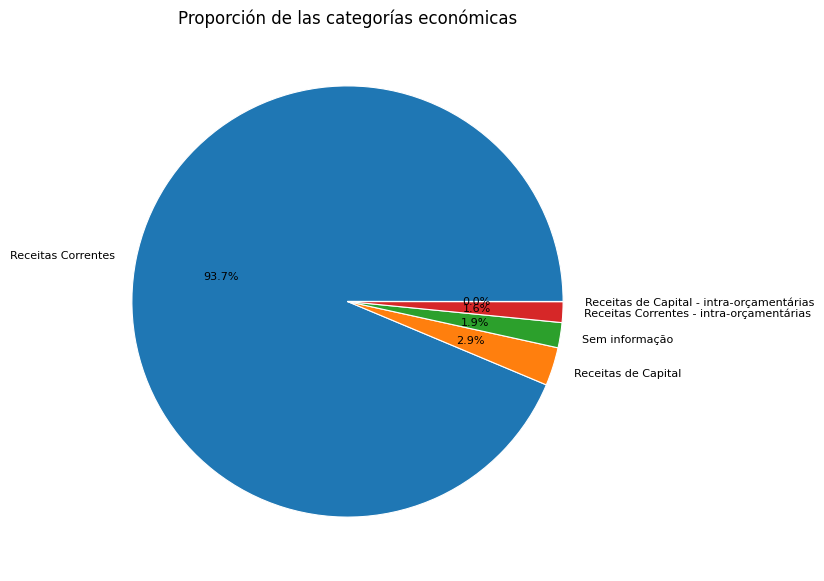

In [93]:
categorias= ["Receitas Correntes","Receitas de Capital", "Sem informação", "Receitas Correntes - intra-orçamentárias", "Receitas de Capital - intra-orçamentárias"]
plt.figure(figsize=(9,7))
plt.pie(proporcioncat, labels= categorias, labeldistance=1.1, wedgeprops = { 'linewidth' : 0.8, 'edgecolor' : 'white' }, autopct= '%1.1f%%', textprops={'fontsize': 8}, startangle= 0)
plt.title("Proporción de las categorías económicas");

In [110]:


proporcion= dfcompletasinNan.groupby("categoria econômica")[['valor realizado']].sum() #No se puede meter tal cual porque tienen dos dimensiones

valores= proporcion["valor realizado"].values
categorias= proporcion.index    #Porque al ponerlo en una lista, no asocia el label a su valor por eso se usa index

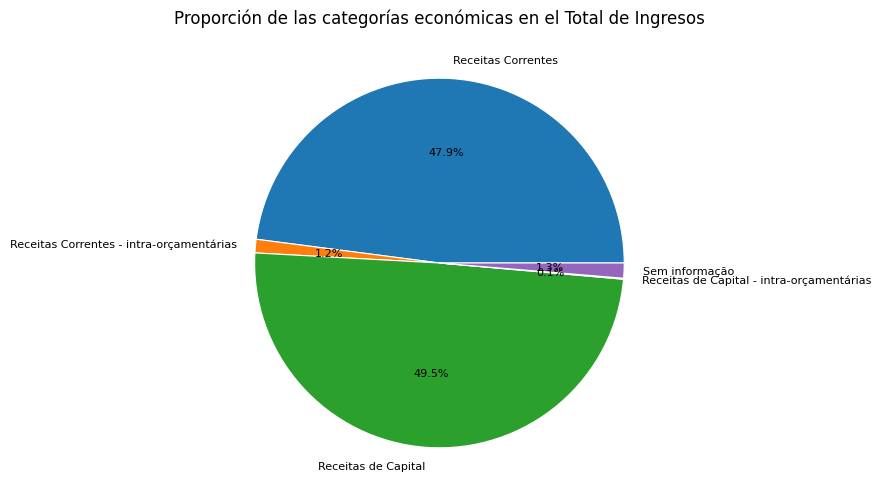

In [116]:
plt.figure(figsize=(8,6))
plt.pie(valores, labels= categorias, labeldistance=1.1, wedgeprops = { 'linewidth' : 0.8, 'edgecolor' : 'white' }, autopct= '%1.1f%%', textprops={'fontsize': 8}, startangle= 0)
plt.title("Proporción de las categorías económicas en el Total de Ingresos");

C:\Users\jaime\AppData\Local\Temp\ipykernel_20752\2125010481.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= media_ingresos.index, y= media_ingresos['diferencia'], palette='mako')


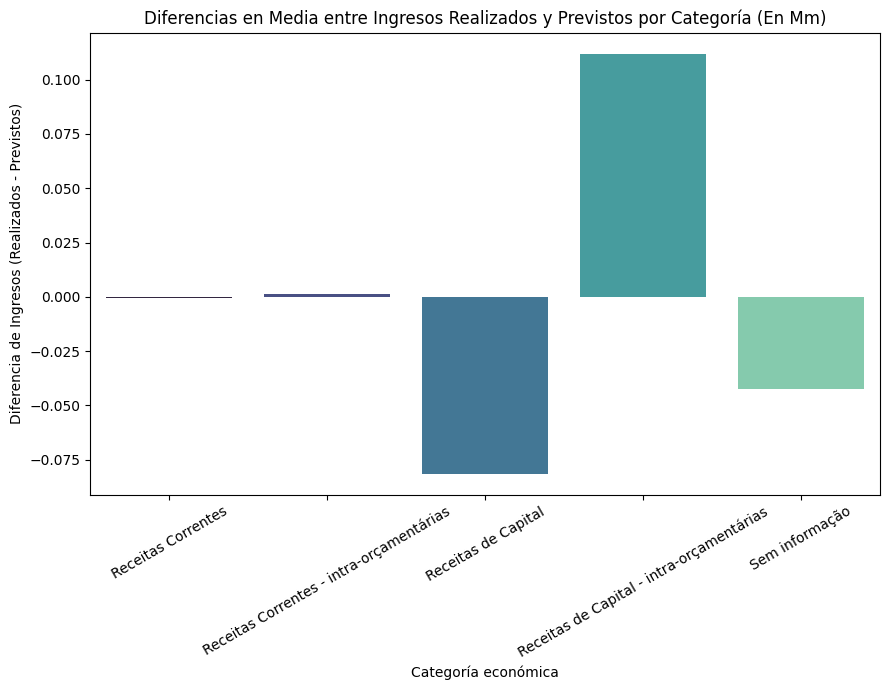

In [141]:

media_ingresos = dfcompletasinNan.groupby('categoria econômica')[['valor realizado', 'valor previsto atualizado']].mean()
media_ingresos['diferencia'] = media_ingresos['valor realizado'] - media_ingresos['valor previsto atualizado']


plt.figure(figsize=(9,7))
sns.barplot(x= media_ingresos.index, y= media_ingresos['diferencia'], palette='mako')
plt.title('Diferencias en Media entre Ingresos Realizados y Previstos por Categoría (En Mm)')
plt.xlabel('Categoría económica')
plt.ylabel('Diferencia de Ingresos (Realizados - Previstos)')
plt.xticks(rotation=30) 
plt.tight_layout();


In [128]:
dfcompletasinNan[["categoria econômica","valor realizado"]].head()

,categoria econômica,valor realizado
0,Receitas Correntes,0.000001
1,Receitas Correntes,0.026667
2,Receitas Correntes,0.000301
3,Receitas Correntes,0.000002
4,Receitas Correntes,0.000052


In [129]:
dfcompletasinNan["valor realizado"].sum()

np.float64(22337.050154407134)